# Heap basiertes sortieren mit Python's heapq

Python verfügt bereits standardmässig über eine Implementation von Heaps. Diese kann mittels ```import heapq``` importiert werden. 

In [21]:
import heapq

In Python ist ein Heap einfach als normale Liste implementiert. Um ein neues Heap zu erstellen, erstellen wir einfach eine neue, leere Liste.

In [22]:
heap = []

Mittels der Operation ```heappush``` können wir nun Elemente zum Heap hinzufügen. Die Operation stellt sicher, dass die Heapbedingung erfüllt ist.  Hier fügen wir das Element 7 zum Heap hinzu. 

In [23]:
heapq.heappush(heap, 7)
print(heap)

[7]


Um das kleinste Element zu entfernen, steht die Operation ```heappop``` zur Verfügung. Auch diese garantiert, dass im heap die Heapbedinung erfüllt bleibt. 

In [24]:
smallestElement = heapq.heappop(heap)
print(smallestElement)

7


## Übung

Implementieren Sie einen Sortieralgorithmus, der mittels ```heapq.heappush``` und ```heapq.heappop``` eine neue Liste
erstellt und zurückgibt. 

In [25]:
def sortList(xs):
    heap = []
    sortedList = []

    for x in xs: 
        heapq.heappush(heap, x)
    
    while (len(heap) > 0):
        sortedList.append(heapq.heappop(heap))
    
    return sortedList

Testen Sie ihre Implementation: Folgendes sollte ```true``` ergeben

In [26]:
sortList([7, 3, 5, 12, 1]) == [1, 3, 5, 7, 12]

True

## Laufzeit

Im folgenden schauen wir uns die Laufzeit des Algorithmus an.  

Als erstes schreiben wir uns eine Funktion, die uns zufällige Listen der Grösse $n$ erstellt

In [27]:
import random

random.seed(a=42)

def generateData(n, min=0, max=int(10e8)):
    return random.sample(range(min, max), n)

Wie wir sehen, führt jeder Aufruf zu einer neuen, unsortierten  Liste:

In [28]:
print(generateData(5))
print(generateData(5))

[686579303, 119540831, 26855092, 796233790, 295310485]
[262950628, 239670711, 149827706, 790779946, 110053353]


Um die Laufzeit zu messen, nutzen wir das timing Utility ```timeit``` von Python

In [29]:
from timeit import timeit

Wir erstellen zufällige Listen der grösse $10^3, 10^4, ..., 10^6$ und merken uns die Laufzeit

In [30]:
runTime = []

ns = [10**n for n in range(3, 7)]
for n in ns:
    xs  = generateData(n)
    runTime.append(timeit(lambda: sortList(xs), number = 10))
    

Nun plotten wir die Laufzeit, und vergleichen diese jeweils mit einer Funktion der Ordnung $O(n)$ und einer mit Ordnung $O(n \log_2 n)$.

In [31]:
import matplotlib
import matplotlib.pyplot as plt
import math

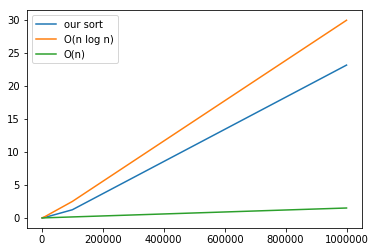

In [32]:
plt.plot(ns, runTime, label = 'our sort')
logValues = [ 0.0000015 * n * math.log(n, 2)  for n in ns]
plt.plot(ns, logValues, label = 'O(n log n)')
linValues = [ 0.0000015 * n  for n in ns]
plt.plot(ns, linValues, label = 'O(n)')
plt.legend()

Wir sehen empirisch, dass die Laufzeit unseres Algorithmus $O(n \log_2 n)$ ist.